In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import model_selection
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import metrics

style.use("seaborn")

In [63]:
data = pd.read_csv("https://raw.githubusercontent.com/Sahil-Rajwar-2004/Datasets/main/weather.csv")
data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


In [64]:
data.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

In [65]:
# Filling the null values

data["Sunshine"] = data["Sunshine"].fillna(data["Sunshine"].mean())
data["WindGustDir"] = data["WindGustDir"].fillna(method = "bfill")
data["WindGustSpeed"] = data["WindGustSpeed"].fillna(data["WindGustSpeed"].mean())
data["WindDir9am"] = data["WindDir9am"].fillna(method = "bfill")
data["WindDir3pm"] = data["WindDir3pm"].fillna(method = "bfill")
data["WindSpeed9am"] = data["WindSpeed9am"].fillna(data["WindSpeed9am"].mean())

In [66]:
data.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [67]:
p = preprocessing.LabelEncoder()
data["WindGustDir"] = p.fit_transform(data["WindGustDir"])
data["WindDir9am"] = p.fit_transform(data["WindDir9am"])
data["WindDir3pm"] = p.fit_transform(data["WindDir3pm"])
data["RainToday"] = p.fit_transform(data["RainToday"])
data["RainTomorrow"] = p.fit_transform(data["RainTomorrow"])

In [68]:
data.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,7,30.0,12,7,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,0,3.6,1
1,14.0,26.9,3.6,4.4,9.7,1,39.0,0,13,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,1,3.6,1
2,13.7,23.4,3.6,5.8,3.3,7,85.0,3,5,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,1,39.8,1
3,13.3,15.5,39.8,7.2,9.1,7,54.0,14,13,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,1,2.8,1
4,7.6,16.1,2.8,5.6,10.6,10,50.0,10,2,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,1,0.0,0
5,6.2,16.9,0.0,5.8,8.2,9,44.0,9,0,20.0,...,57,1023.8,1021.7,7,5,10.9,14.8,0,0.2,0
6,6.1,18.2,0.2,4.2,8.4,9,43.0,9,2,19.0,...,47,1024.6,1022.2,4,6,12.4,17.3,0,0.0,0
7,8.3,17.0,0.0,5.6,4.6,0,41.0,9,0,11.0,...,57,1026.2,1024.2,6,7,12.1,15.5,0,0.0,0
8,8.8,19.5,0.0,4.0,4.1,8,48.0,0,1,19.0,...,48,1026.1,1022.7,7,7,14.1,18.9,0,16.2,1
9,8.4,22.8,16.2,5.4,7.7,0,31.0,8,2,7.0,...,32,1024.1,1020.7,7,1,13.3,21.7,1,0.0,0


In [69]:
x = data.drop(["RainToday", "RainTomorrow"], axis = 1)
y = data["RainToday"]
z = data["RainTomorrow"]

In [70]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y ,test_size=0.1)
model = linear_model.LinearRegression()
model.fit(x_train,y_train)
prediction = model.predict(x_test)
test = list(y_test)
values = []
for i in range(0,len(prediction)):
    x = int(prediction[i])
    values.append(x)

In [71]:
score = 0
for j in range(0,len(values)):
    if test[j] == values[j]:
        score+=1
    else:
        score+=0
score

32

In [85]:
accuracy = score/len(prediction)
accuracy

0.8648648648648649

In [86]:
metrics.accuracy_score(y_test,values)

0.8648648648648649

Text(0, 0.5, 'Rainfall')

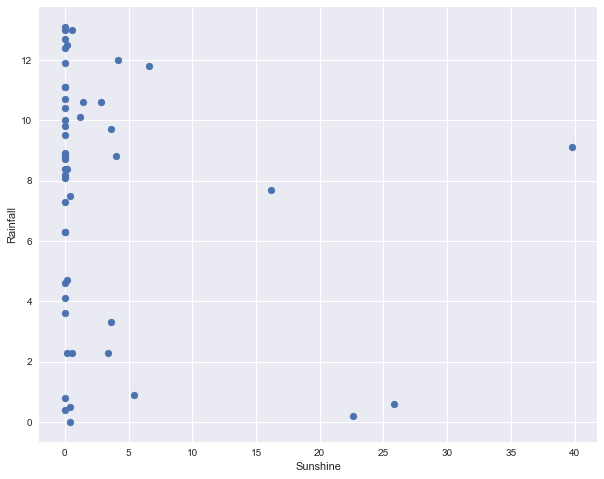

In [72]:
plt.figure(figsize = (10,8))
plt.scatter(data.Rainfall[:50], data.Sunshine[:50])
plt.xlabel("Sunshine")
plt.ylabel("Rainfall")